In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:38511 Dashboard: /proxy/46457/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_hourly.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_nostress_cont_hourly','025deg_jra55_ryf_nostress_hourly','025deg_jra55_ryf_nostress_naive']

In [4]:
vars_025deg = cc.querying.get_variables(session, experiment= expt[0])
vars_025deg[vars_025deg['name'].str.lower().str.match('tau')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
171,tau_x,i-directed wind stress forcing u-velocity,1 monthly,output000/ocean/ocean-2d-tau_x-1-monthly-mean-...,1,1900-01-01 00:00:00,1900-02-01 00:00:00
172,tau_y,j-directed wind stress forcing v-velocity,1 monthly,output000/ocean/ocean-2d-tau_y-1-monthly-mean-...,1,1900-01-01 00:00:00,1900-02-01 00:00:00


## 1. Velocity shear

In [5]:
u_snap_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'u', frequency = '1 hourly')
u_snap_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'u', frequency = '1 hourly')
u_snap_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'u', frequency = '1 hourly')

v_snap_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'v', frequency = '1 hourly')
v_snap_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'v', frequency = '1 hourly')
v_snap_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'v', frequency = '1 hourly')

Text(0.5, 1.0, 'u-velocity shear for x = -35 and y = 10')

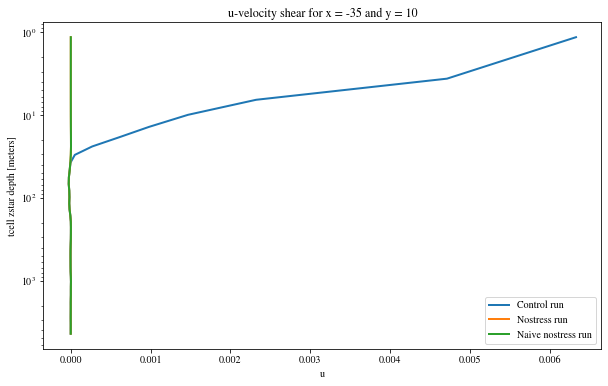

In [7]:
x_val = -35
y_val = 10

u_shear_con_NA = u_snap_con.sel(xu_ocean = x_val,method = 'nearest').sel(yu_ocean = y_val,method = 'nearest').differentiate('st_ocean')
u_shear_buo_NA = u_snap_buo.sel(xu_ocean = x_val,method= 'nearest').sel(yu_ocean = y_val,method = 'nearest').differentiate('st_ocean')
u_shear_naive_NA = u_snap_naive.sel(xu_ocean = x_val,method = 'nearest').sel(yu_ocean = y_val,method = 'nearest').differentiate('st_ocean')

plt.figure(figsize = (10,6))
plt.yscale('log')
plt.gca().invert_yaxis()
u_shear_con_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Control run')
u_shear_buo_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Nostress run')
u_shear_naive_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Naive nostress run')
plt.legend()
plt.title('u-velocity shear for x = ' + str(x_val) + ' and y = ' + str(y_val))

In [8]:
hblt_snap_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'hblt', frequency = '1 hourly')
hblt_snap_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'hblt', frequency = '1 hourly')
hblt_snap_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'hblt', frequency = '1 hourly')

Text(0.5, 1.0, 'KPP mixing layer for x = -45 and y = 10')

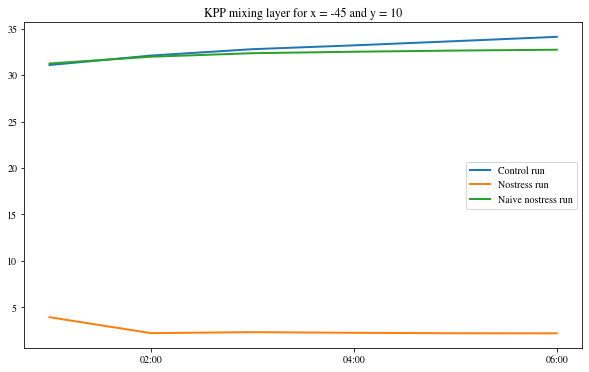

In [9]:
x_val = -45
v_val = 40

hblt_snap_con_NA_values = hblt_snap_con.sel(xt_ocean = x_val,method = 'nearest').sel(yt_ocean = y_val,method = 'nearest').values
hblt_snap_buo_NA_values = hblt_snap_buo.sel(xt_ocean = x_val,method = 'nearest').sel(yt_ocean = y_val,method = 'nearest').values
hblt_snap_naive_NA_values = hblt_snap_naive.sel(xt_ocean = x_val,method = 'nearest').sel(yt_ocean = y_val,method = 'nearest').values

plt.figure(figsize = (10,6))
plt.plot(hblt_snap_con.time,hblt_snap_con_NA_values,label = 'Control run')
plt.plot(hblt_snap_con.time,hblt_snap_buo_NA_values,label = 'Nostress run')
plt.plot(hblt_snap_con.time,hblt_snap_naive_NA_values,label = 'Naive nostress run')
plt.legend()
plt.title('KPP mixing layer for x = ' + str(x_val) + ' and y = ' + str(y_val))

Text(0.5, 1.0, 'v-velocity shear for x = -45 and y = 40')

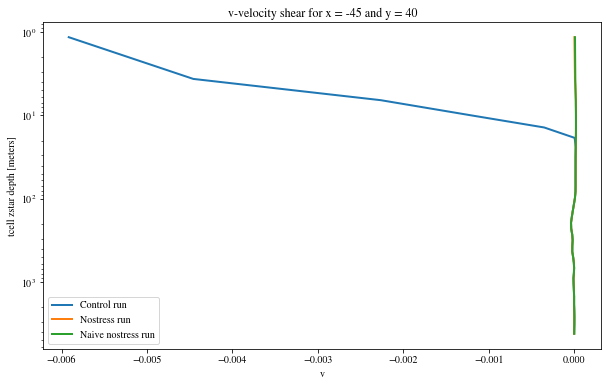

In [10]:
x_val = -45
y_val = 40

v_shear_con_NA = v_snap_con.sel(xu_ocean = x_val,method = 'nearest').sel(yu_ocean = y_val,method = 'nearest').differentiate('st_ocean')
v_shear_buo_NA = v_snap_buo.sel(xu_ocean = x_val,method= 'nearest').sel(yu_ocean = y_val,method = 'nearest').differentiate('st_ocean')
v_shear_naive_NA = v_snap_naive.sel(xu_ocean = x_val,method = 'nearest').sel(yu_ocean = y_val,method = 'nearest').differentiate('st_ocean')

plt.figure(figsize = (10,6))
plt.yscale('log')
plt.gca().invert_yaxis()
v_shear_con_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Control run')
v_shear_buo_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Nostress run')
v_shear_naive_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Naive nostress run')
plt.legend()
plt.title('v-velocity shear for x = ' + str(x_val) + ' and y = ' + str(y_val))

In [11]:
u_snap_buo.sel(xu_ocean = x_val,method = 'nearest').sel(yu_ocean = y_val,method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array([-3.7581377e-02, -3.7599687e-02, -3.7691209e-02, -3.7802320e-02,
       -3.7920821e-02, -3.8058408e-02, -3.8227782e-02, -3.8432162e-02,
       -3.8659997e-02, -3.8907271e-02, -3.9172418e-02, -3.9449848e-02,
       -3.9739430e-02, -3.9944369e-02, -4.0004112e-02, -3.9990857e-02,
       -3.9849479e-02, -3.9345384e-02, -3.8415860e-02, -3.7063699e-02,
       -3.4923289e-02, -3.1712491e-02, -2.7997946e-02, -2.3875615e-02,
       -1.9183565e-02, -1.4901464e-02, -1.0556384e-02, -6.4039943e-03,
       -3.9357883e-03, -2.6310587e-03, -1.6880258e-03, -1.0867459e-03,
       -8.8361767e-04, -7.5548206e-04, -6.6227128e-04, -5.5724988e-04,
       -3.2025878e-04, -6.9173206e-05,  2.6221207e-04,  5.7470094e-04,
        9.1243570e-04,  1.2220939e-03,  1.3588414e-03,  1.3884251e-03,
        1.4445987e-03,  1.4809491e-03,            nan,            nan,
                  nan,            nan], dtype=float32)

In [12]:
u_snap_con.sel(xu_ocean = x_val,method = 'nearest').sel(yu_ocean = y_val,method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array([ 7.7115312e-02,  3.5625171e-02,  7.3353378e-03, -1.9873230e-02,
       -3.6958437e-02, -3.8056549e-02, -3.8227838e-02, -3.8432222e-02,
       -3.8660053e-02, -3.8907323e-02, -3.9172471e-02, -3.9449897e-02,
       -3.9739471e-02, -3.9944399e-02, -4.0004130e-02, -3.9990868e-02,
       -3.9849479e-02, -3.9345372e-02, -3.8415838e-02, -3.7063662e-02,
       -3.4923229e-02, -3.1712420e-02, -2.7997877e-02, -2.3875544e-02,
       -1.9183496e-02, -1.4901401e-02, -1.0556322e-02, -6.4039375e-03,
       -3.9357417e-03, -2.6310168e-03, -1.6879864e-03, -1.0867091e-03,
       -8.8358275e-04, -7.5544784e-04, -6.6223810e-04, -5.5721891e-04,
       -3.2022884e-04, -6.9143694e-05,  2.6224015e-04,  5.7472737e-04,
        9.1246032e-04,  1.2221166e-03,  1.3588620e-03,  1.3884435e-03,
        1.4446147e-03,  1.4809660e-03,            nan,            nan,
                  nan,            nan], dtype=float32)

In [13]:
u_snap_naive.sel(xu_ocean = x_val,method = 'nearest').sel(yu_ocean = y_val,method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array([-3.7557404e-02, -3.7608530e-02, -3.7701268e-02, -3.7802398e-02,
       -3.7920825e-02, -3.8058408e-02, -3.8227782e-02, -3.8432162e-02,
       -3.8659997e-02, -3.8907271e-02, -3.9172422e-02, -3.9449848e-02,
       -3.9739430e-02, -3.9944373e-02, -4.0004112e-02, -3.9990857e-02,
       -3.9849482e-02, -3.9345387e-02, -3.8415860e-02, -3.7063703e-02,
       -3.4923289e-02, -3.1712491e-02, -2.7997948e-02, -2.3875616e-02,
       -1.9183567e-02, -1.4901466e-02, -1.0556386e-02, -6.4039957e-03,
       -3.9357902e-03, -2.6310603e-03, -1.6880275e-03, -1.0867476e-03,
       -8.8361942e-04, -7.5548381e-04, -6.6227303e-04, -5.5725162e-04,
       -3.2026056e-04, -6.9174966e-05,  2.6221029e-04,  5.7469920e-04,
        9.1243390e-04,  1.2220921e-03,  1.3588397e-03,  1.3884234e-03,
        1.4445968e-03,  1.4809474e-03,            nan,            nan,
                  nan,            nan], dtype=float32)

## 2. Buoyancy Profiles

In [14]:
from gsw import SA_from_SP, p_from_z, CT_from_pt, rho

S_snap_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'salt', frequency = '1 hourly')
S_snap_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'salt', frequency = '1 hourly')
S_snap_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'salt', frequency = '1 hourly')

T_snap_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'temp', frequency = '1 hourly')
T_snap_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'temp', frequency = '1 hourly')
T_snap_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'temp', frequency = '1 hourly')

Y,Z,X =  np.meshgrid(T_snap_con.yt_ocean,T_snap_con.st_ocean,T_snap_con.xt_ocean)
pressure_array = xr.DataArray(p_from_z(-Z,Y),  coords = [T_snap_con.st_ocean, T_snap_con.yt_ocean, T_snap_con.xt_ocean],  
                              dims = ['st_ocean','yt_ocean', 'xt_ocean'], name = 'pressure', attrs = {'units':'dbar'})
rho_mat_snap_con = rho(S_snap_con,T_snap_con-273.15,pressure_array)
rho_mat_snap_buo = rho(S_snap_buo,T_snap_buo-273.15,pressure_array)
rho_mat_snap_naive = rho(S_snap_naive,T_snap_naive-273.15,pressure_array)

Text(0.5, 1.0, 'del rho/del z for x = -200 and y = 30')

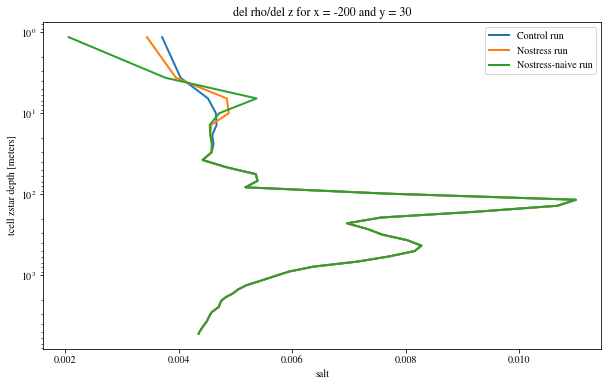

In [21]:
x_val = -200
y_val = 30

plt.figure(figsize = (10,6))
plt.yscale('log')
plt.gca().invert_yaxis()
rho_mat_snap_con.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').sel(
    xt_ocean = x_val,method = 'nearest').sel(yt_ocean = y_val,method = 'nearest').differentiate('st_ocean').plot(y = 'st_ocean',label = 'Control run')
rho_mat_snap_buo.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').sel(
    xt_ocean = x_val,method = 'nearest').sel(yt_ocean = y_val,method = 'nearest').differentiate('st_ocean').plot(y = 'st_ocean',label = 'Nostress run')
rho_mat_snap_naive.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').sel(
    xt_ocean = x_val,method = 'nearest').sel(yt_ocean = y_val,method = 'nearest').differentiate('st_ocean').plot(y = 'st_ocean',label = 'Nostress-naive run')
plt.legend()
plt.title('del rho/del z for x = ' + str(x_val) + ' and y = ' + str(y_val))

### 2.1 Averaging del rho/del z for North Atlantic

In [23]:
area_t = cc.querying.getvar(expt=expt[0], variable='area_t', session=session, frequency='static', n=1)
area_t_NA = area_t.sel(xt_ocean = slice(-90,10)).sel(yt_ocean = slice(10,65))
area_cor_NA = (xr.ufuncs.isfinite(hblt_snap_con)*area_t_NA).mean('time')

In [26]:
rhodz_avg_con_NA = (rho_mat_snap_con.differentiate('st_ocean')*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
rhodz_avg_buo_NA = (rho_mat_snap_buo.differentiate('st_ocean')*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
rhodz_avg_naive_NA = (rho_mat_snap_naive.differentiate('st_ocean')*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'del rho/del z for x = -200 and y = 30')

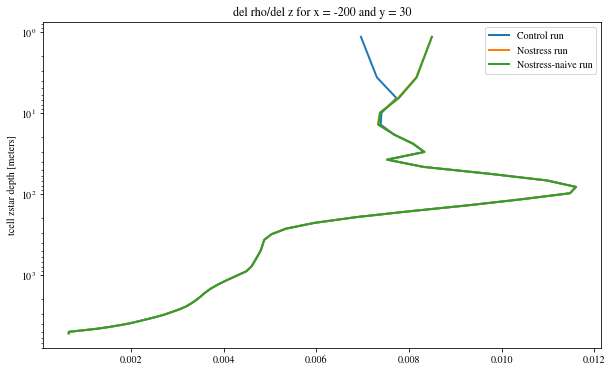

In [27]:
plt.figure(figsize = (10,6))
plt.yscale('log')
plt.gca().invert_yaxis()

rhodz_avg_con_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Control run')
rhodz_avg_buo_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Nostress run')
rhodz_avg_naive_NA.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Nostress-naive run')
plt.legend()
plt.title('del rho/del z for x = ' + str(x_val) + ' and y = ' + str(y_val))

### 2.2 Averaging del rho/del z for North Pacific

In [28]:
area_t_NP = area_t.sel(xt_ocean = slice(-250,-100)).sel(yt_ocean = slice(10,65))
area_cor_NP = (xr.ufuncs.isfinite(hblt_snap_con)*area_t_NP).mean('time')

In [31]:
rhodz_avg_con_NP = (rho_mat_snap_con.differentiate('st_ocean')*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
rhodz_avg_buo_NP = (rho_mat_snap_buo.differentiate('st_ocean')*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
rhodz_avg_naive_NP = (rho_mat_snap_naive.differentiate('st_ocean')*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'del rho/del z for x = -200 and y = 30')

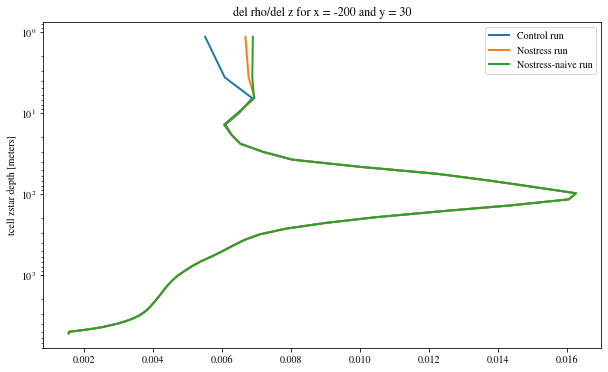

In [32]:
plt.figure(figsize = (10,6))
plt.yscale('log')
plt.gca().invert_yaxis()

rhodz_avg_con_NP.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Control run')
rhodz_avg_buo_NP.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Nostress run')
rhodz_avg_naive_NP.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = 'Nostress-naive run')
plt.legend()
plt.title('del rho/del z for x = ' + str(x_val) + ' and y = ' + str(y_val))

## 3. Potential Density

In [33]:
potrho_2_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'pot_rho_2', frequency = '1 hourly') - 1000
potrho_2_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'pot_rho_2', frequency = '1 hourly') - 1000
potrho_2_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'pot_rho_2', frequency = '1 hourly') - 1000

<a list of 18 text.Text objects>

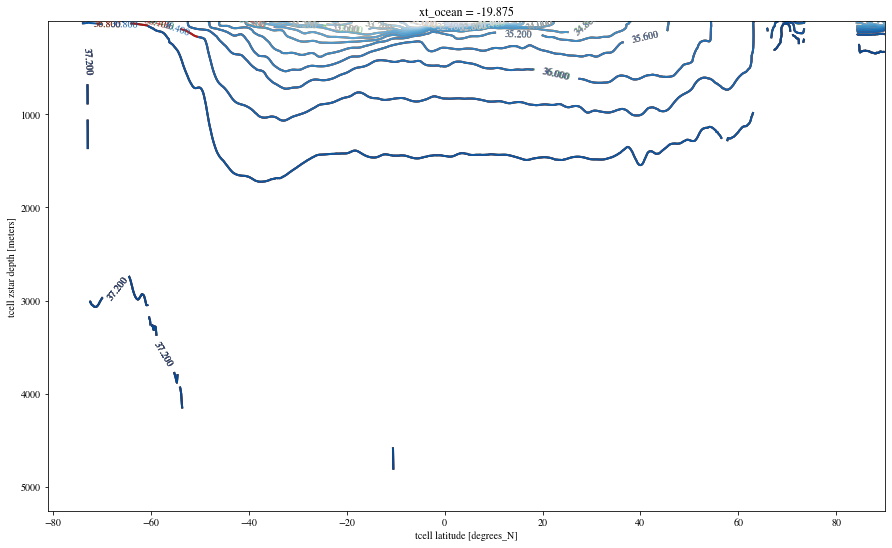

In [34]:
x_val = -20
plt.figure(figsize = (15,9))

test_1 = potrho_2_con.sel(xt_ocean = x_val,method = 'nearest').sel(
    time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contour(levels = np.linspace(30,38,21),cmap = 'Greens')
plt.gca().invert_yaxis()
plt.clabel(test_1, inline=True,fontsize=10)

test_2 = potrho_2_buo.sel(xt_ocean = x_val,method = 'nearest').sel(
    time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contour(levels = np.linspace(30,38,21),cmap = 'Reds')
plt.gca().invert_yaxis()
plt.clabel(test_2, inline=True,fontsize=10)

test_3 = potrho_2_naive.sel(xt_ocean = x_val,method = 'nearest').sel(
    time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contour(levels = np.linspace(30,38,21),cmap = 'Blues')
plt.gca().invert_yaxis()
plt.clabel(test_3, inline=True,fontsize=10)

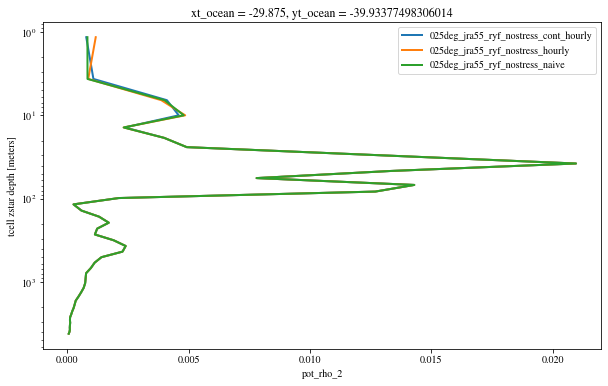

In [36]:
x_val = -30
y_val = -40
plt.figure(figsize = (10,6))
plt.gca().invert_yaxis()
plt.yscale('log')

potrho_2_con.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').differentiate('st_ocean').plot(y = 'st_ocean',label = expt[0])
potrho_2_buo.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').differentiate('st_ocean').plot(y = 'st_ocean',label = expt[1])
potrho_2_naive.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').differentiate('st_ocean').plot(y = 'st_ocean',label = expt[2])

plt.legend()

## 4. Velocity plots (to determine shear qualitatively)

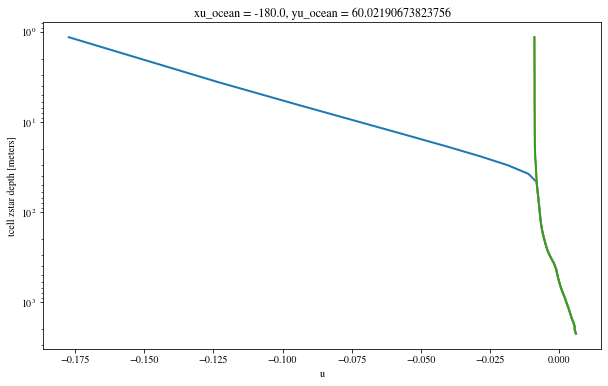

In [37]:
x_val = -180
y_val = 60

plt.figure(figsize = (10,6))
plt.gca().invert_yaxis()
plt.yscale('log')

u_snap_con.sel(xu_ocean = x_val, method = 'nearest').sel(yu_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')
u_snap_buo.sel(xu_ocean = x_val, method = 'nearest').sel(yu_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')
u_snap_naive.sel(xu_ocean = x_val, method = 'nearest').sel(yu_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')

In [38]:
hblt_snap_con.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array(50.516037, dtype=float32)

In [39]:
hblt_snap_buo.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array(8.268195, dtype=float32)

In [44]:
hblt_snap_naive.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array(6.311169, dtype=float32)

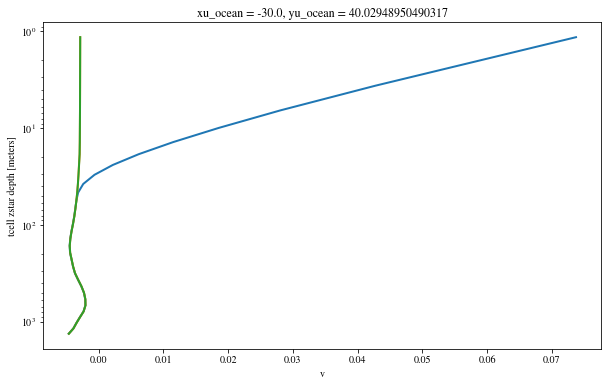

In [40]:
x_val = -30
y_val = 40

plt.figure(figsize = (10,6))
plt.gca().invert_yaxis()
plt.yscale('log')

v_snap_con.sel(xu_ocean = x_val, method = 'nearest').sel(yu_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')
v_snap_buo.sel(xu_ocean = x_val, method = 'nearest').sel(yu_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')
v_snap_naive.sel(xu_ocean = x_val, method = 'nearest').sel(yu_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')

In [41]:
hblt_snap_buo.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array(6.5228353, dtype=float32)

In [42]:
hblt_snap_con.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array(69.81167, dtype=float32)

In [43]:
hblt_snap_naive.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').values

array(6.311169, dtype=float32)

## 5. Richardson Number Analysis

In [45]:
g = 9.81
rho0 = 1025
NN_con = -(g/rho0)*rho_mat_snap_con.differentiate('st_ocean')
NN_buo = -(g/rho0)*rho_mat_snap_buo.differentiate('st_ocean')
NN_naive = -(g/rho0)*rho_mat_snap_naive.differentiate('st_ocean')

In [46]:
import xgcm

paths = []
paths.append("/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_hourly/output000/ocean/ocean-3d-u-1-hourly-snap-ym_1900_01.nc")
data = xr.merge((u_snap_con,v_snap_con,T_snap_con))
data.coords['xu_ocean'].attrs.update(axis='X')
data.coords['xt_ocean'].attrs.update(axis='X',c_grid_axis_shift=0.5)
data.coords['yu_ocean'].attrs.update(axis='Y')
data.coords['yt_ocean'].attrs.update(axis='Y',c_grid_axis_shift=0.5)
data.coords['st_ocean'].attrs.update(axis='Z')

g = xgcm.Grid(data, periodic=['X'])
u = g.interp(u_snap_con,'X')
u_con_interp = g.interp(u,'Y',boundary="extend")

g = xgcm.Grid(data, periodic=['Y'])
v = g.interp(v_snap_con,'Y')
v_con_interp = g.interp(v,'X',boundary="extend")

In [47]:
paths = []
paths.append("/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_hourly/output000/ocean/ocean-3d-u-1-hourly-snap-ym_1900_01.nc")
data = xr.merge((u_snap_buo,v_snap_buo,T_snap_buo))
data.coords['xu_ocean'].attrs.update(axis='X')
data.coords['xt_ocean'].attrs.update(axis='X',c_grid_axis_shift=0.5)
data.coords['yu_ocean'].attrs.update(axis='Y')
data.coords['yt_ocean'].attrs.update(axis='Y',c_grid_axis_shift=0.5)
data.coords['st_ocean'].attrs.update(axis='Z')

g = xgcm.Grid(data, periodic=['X'])
u = g.interp(u_snap_buo,'X')
u_buo_interp = g.interp(u,'Y',boundary="extend")

g = xgcm.Grid(data, periodic=['Y'])
v = g.interp(v_snap_buo,'Y')
v_buo_interp = g.interp(v,'X',boundary="extend")

In [48]:
paths = []
paths.append("/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_naive/output000/ocean/ocean-3d-u-1-hourly-snap-ym_1900_01.nc")
data = xr.merge((u_snap_naive,v_snap_naive,T_snap_naive))
data.coords['xt_ocean'].attrs.update(axis='X')
data.coords['xu_ocean'].attrs.update(axis='X',c_grid_axis_shift=0.5)
data.coords['yt_ocean'].attrs.update(axis='Y')
data.coords['yu_ocean'].attrs.update(axis='Y',c_grid_axis_shift=0.5)
data.coords['st_ocean'].attrs.update(axis='Z')

g = xgcm.Grid(data, periodic=['X'])
u = g.interp(u_snap_naive,'X')
u_naive_interp = g.interp(u,'Y',boundary="extend")

g = xgcm.Grid(data, periodic=['Y'])
v = g.interp(v_snap_naive,'Y')
v_naive_interp = g.interp(v,'X',boundary="extend")

### (a) $N^2 = -\frac{g}{\rho_0} \frac{\partial \rho}{\partial z}$

Text(0.5, 1.0, 'Brunt Vaisala frequency for x = -30 and y = 20')

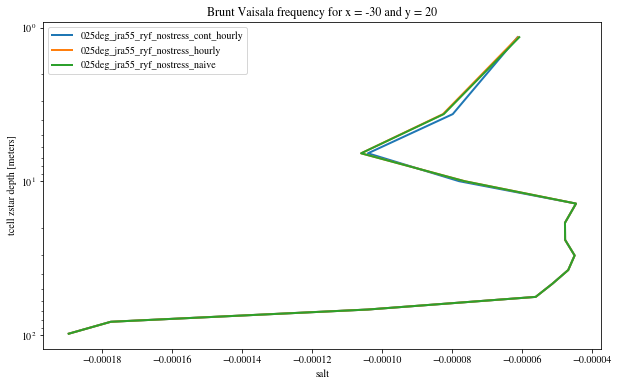

In [56]:
x_val = -30
y_val = 20

plt.figure(figsize = (10,6))
plt.gca().invert_yaxis()
plt.yscale('log')

NN_con.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,100)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = expt[0])

NN_buo.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,100)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = expt[1])

NN_naive.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,100)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = expt[2])

plt.legend()
plt.title('Brunt Vaisala frequency for x = ' + str(x_val) + ' and y = ' + str(y_val))

Text(0.5, 1.0, 'Brunt Vaisala frequency for x = -200 and y = 30')

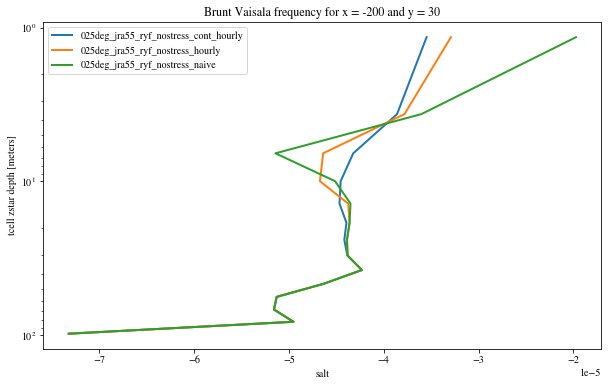

In [57]:
x_val = -200
y_val = 30

plt.figure(figsize = (10,6))
plt.gca().invert_yaxis()
plt.yscale('log')

NN_con.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,100)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = expt[0])

NN_buo.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,100)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = expt[1])

NN_naive.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,100)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean',label = expt[2])

plt.legend()
plt.title('Brunt Vaisala frequency for x = ' + str(x_val) + ' and y = ' + str(y_val))

### (b) Velocity shear = $\Big( \big( \frac{\partial u}{\partial z} \big) + \big( \frac{\partial v}{\partial z}\big) \Big)^\frac{1}{2} + V_t^2(d)$

In [59]:
vel_shear_con = ((u_con_interp.differentiate('st_ocean'))**2 + (v_con_interp.differentiate('st_ocean'))**2)**(0.5)
vel_shear_buo = ((u_buo_interp.differentiate('st_ocean'))**2 + (v_buo_interp.differentiate('st_ocean'))**2)**(0.5)
vel_shear_naive = ((u_naive_interp.differentiate('st_ocean'))**2 + (v_naive_interp.differentiate('st_ocean'))**2)**(0.5)

In [76]:
#Calculating Richardson number without Vtsq

Rib_con = (-NN_con*NN_con.st_ocean**2)/(vel_shear_con**2)
Rib_buo = (-NN_buo*NN_buo.st_ocean**2)/(vel_shear_buo**2)
Rib_naive = (-NN_naive*NN_naive.st_ocean**2)/(vel_shear_naive**2)

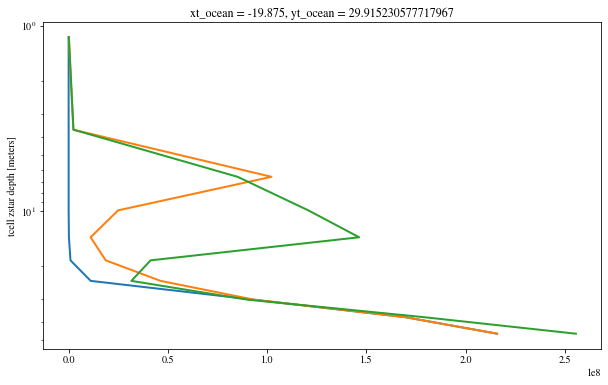

In [77]:
x_val = -20
y_val = 30

plt.figure(figsize = (10,6))
plt.gca().invert_yaxis()
plt.yscale('log')

Rib_con.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,50)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')

Rib_buo.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,50)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')

Rib_naive.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,50)).sel(
    time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot(y = 'st_ocean')

The denominator is the issue, because the resolved velocity shear is very different in the two cases. This happens because in the code, the horizontal velocities evolve very differently for the three cases. The u and v-velocities evolve according to the momentum equations, which for the no-stress and the naive-no-stress cases, do not contain the wind stress term.

### How big is the term $V_t^2$??

$$V_t^2 = \frac{C_v (-\beta_T)^\frac{1}{2}}{Ri_{cr} \kappa^2} (c_s \epsilon)^\frac{-1}{2} dN w_s $$

In the model, $C_v$ = 1.8, $\beta_T$ (ratio of buoyancy flux at the base of ML and the surface) = -0.2, $Ri_{cr}$ = 0.3, $\kappa$ (Von-Karman constant) = 0.4, $c_s$ = 98.96, $\epsilon$ (the ratio of Monin Obukhov length and KPP mixing layer) = 0.1. These values stay the same for all three runs. The only terms differing are $N$ (Brunt Vaisala frequency) and $w_s$ (depth dependent turbulent velocity scale). From our previous analysis, $N$ doesn't vary much in the three runs, and we analyse the last term, $w_s$ in more detail. 

The $w_s$ is given by:

$$w_s = \kappa (a_s u^{*3} + c_x \kappa \sigma w^{*3}) ^{\frac{1}{3}} \text{       for      } \sigma < \epsilon$$

$$w_s = \kappa (a_s u^{*3} + c_x \kappa \epsilon w^{*3}) ^{\frac{1}{3}} \text{       for      } \epsilon \le \sigma < 1$$

where $\sigma = \frac{z}{h_{KPP}}$, and $\sigma \in [0,1]$. In the model, $a_s = -28.86$, $c_s = 98.96$, $u^* = \big(\frac{\tau}{\rho} \big)^{0.5}$ is the friction velocity. All these will be the same for all three cases. Finally, we have $w^* = (-B_f h)^{\frac{1}{3}}$. Here, $B_f$ is the surface buoyancy forcing and h is the KPP mixing layer. Now, after the first hour, the KPP mixing layer diverges a lot in the three runs, but $B_f$ stays almost the same for the first 6 hours.